# Preliminary list of data-sets:


In [ ]:
# Let's import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler #undersampling

In [ ]:
# Reading the data:

In [2]:
fetal = pd.read_csv('/content/fetal_health.csv')

In [3]:
fetal['fetal_health'] = fetal['fetal_health'].astype(int)

In [4]:
df = fetal

#### renaming variables to shorten them

In [9]:
new_column_names = {
    'baseline value': 'baseline_val',
    'accelerations': 'accelerations',
    'fetal_movement': 'fetal_mov',
    'uterine_contractions': 'uterine_contractions',
    'light_decelerations': 'light_decelerations',
    'severe_decelerations': 'severe_decelerations',
    'prolongued_decelerations': 'prolong_decelerations',
    'abnormal_short_term_variability': 'abnorm_short_var',
    'mean_value_of_short_term_variability': 'mean_short_var',
    'percentage_of_time_with_abnormal_long_term_variability': 'perc_time_abnorm_long_var',
    'mean_value_of_long_term_variability': 'mean_long_var',
    'histogram_width': 'hist_width',
    'histogram_min': 'hist_min',
    'histogram_max': 'hist_max',
    'histogram_number_of_peaks': 'hist_peaks',
    'histogram_number_of_zeroes': 'hist_zeroes',
    'histogram_mode': 'hist_mode',
    'histogram_mean': 'hist_mean',
    'histogram_median': 'hist_median',
    'histogram_variance': 'hist_var',
    'histogram_tendency': 'hist_tendency',
    'fetal_health': 'fetal_health'
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)


In [10]:
corr = df.corr(method='pearson')

corr

,baseline_val,accelerations,fetal_mov,uterine_contractions,light_decelerations,severe_decelerations,prolong_decelerations,abnorm_short_var,mean_short_var,perc_time_abnorm_long_var,...,hist_min,hist_max,hist_peaks,hist_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
baseline_val,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_mov,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolong_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnorm_short_var,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_short_var,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
perc_time_abnorm_long_var,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


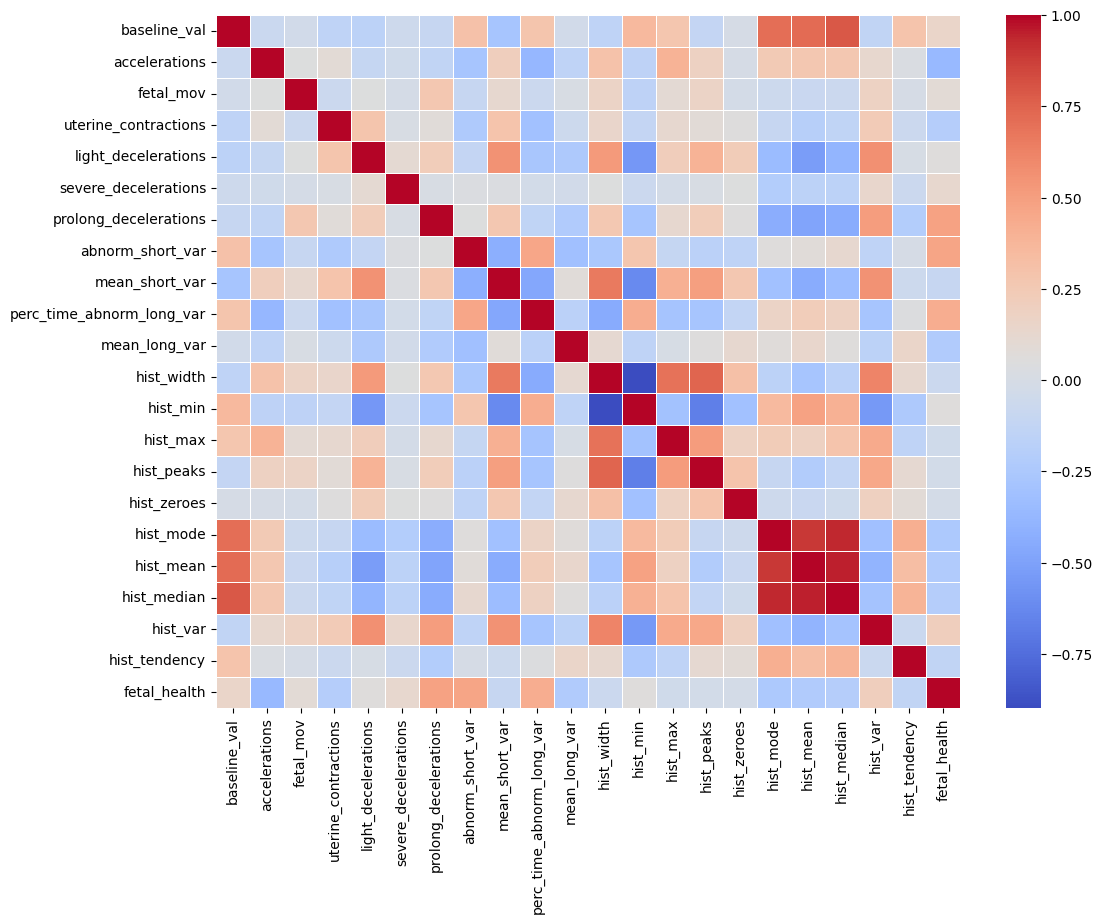

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Generate a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=.5)

# Show the plot
plt.show()


In [12]:
df = df.drop([ 'hist_mode','hist_median', 'hist_width','baseline_val'], axis=1)


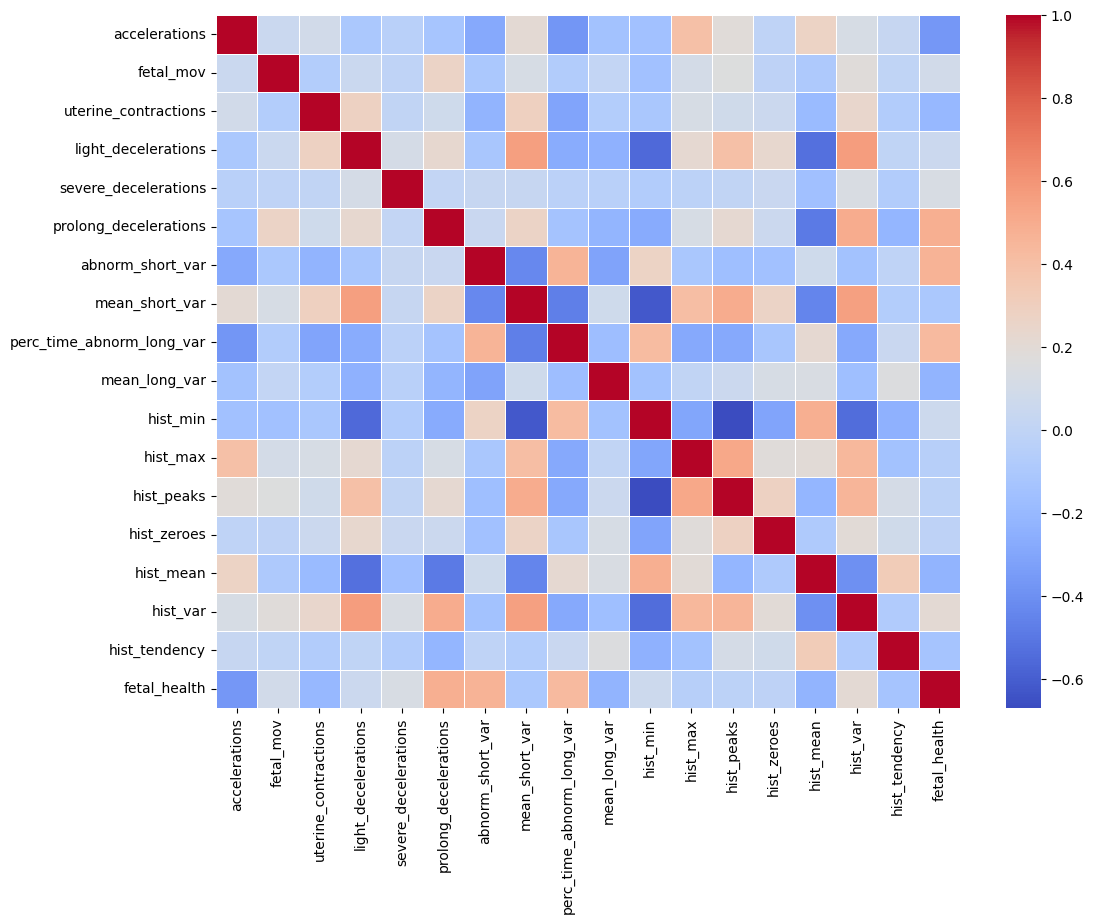

In [13]:
# New correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=.5)
plt.show()


### Pichart

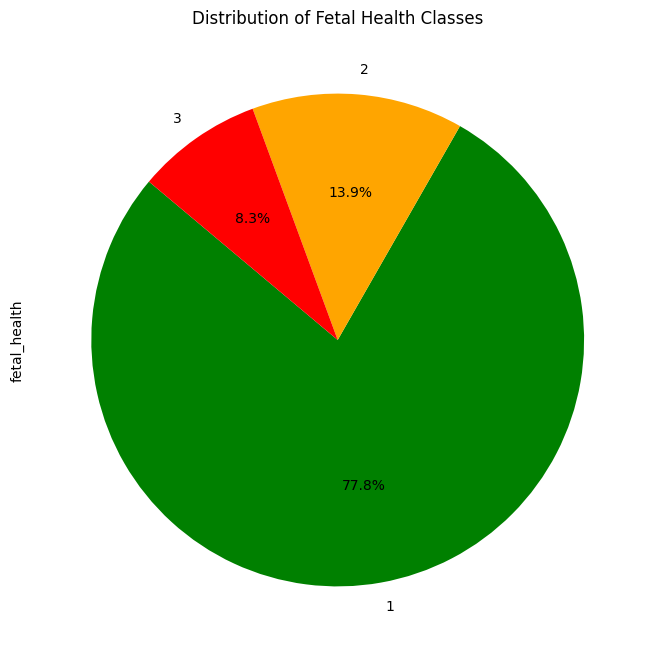

In [14]:
# Get the value counts of the 'fetal_health' column
class_counts = df['fetal_health'].value_counts()

# Specify colors: assuming class 1 is 'Normal', class 3 is 'Pathological'
colors = ['green', 'orange', 'red']  # Adjust according to your class order

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Fetal Health Classes')
plt.ylabel('fetal_health')
plt.show()

In [15]:
fetal.describe()

,baseline_val,accelerations,fetal_mov,uterine_contractions,light_decelerations,severe_decelerations,prolong_decelerations,abnorm_short_var,mean_short_var,perc_time_abnorm_long_var,...,hist_min,hist_max,hist_peaks,hist_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


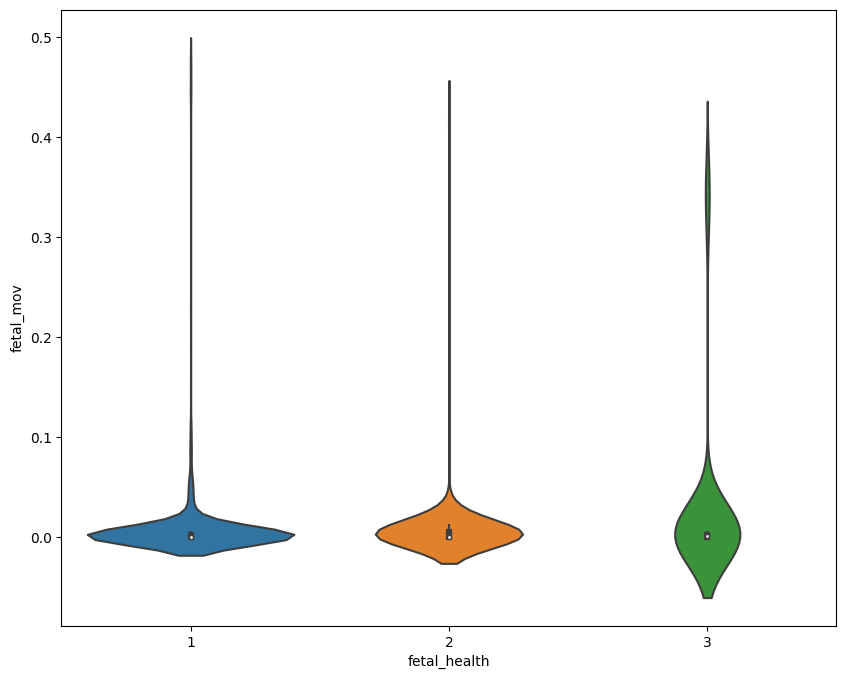

In [17]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="fetal_health", y="fetal_mov", data=fetal)

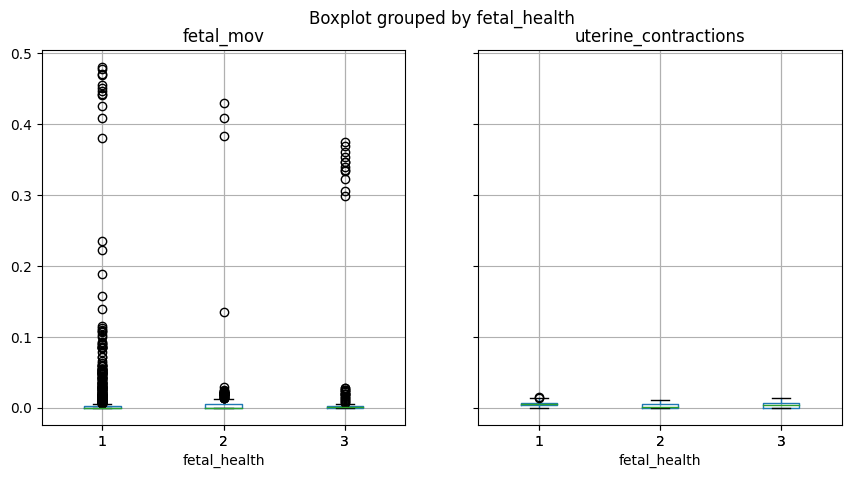

In [18]:
boxplot = fetal.boxplot(column=['fetal_mov', 'uterine_contractions'], by = 'fetal_health', figsize=(10,5))


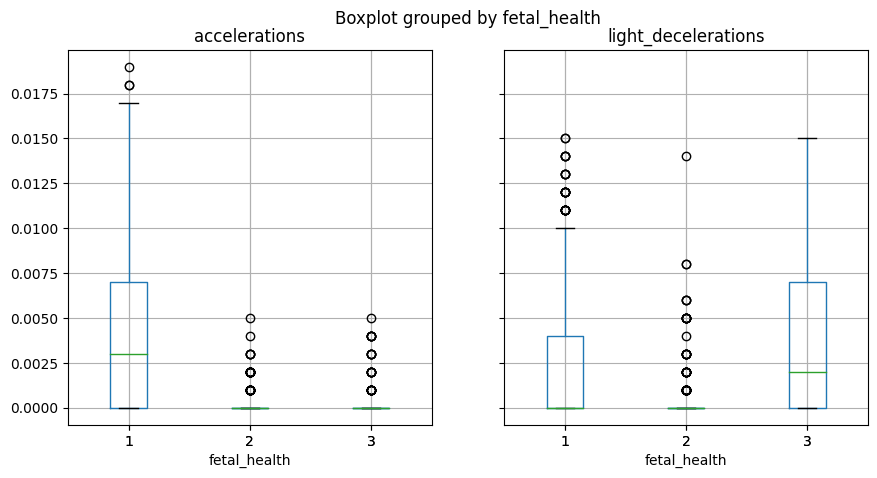

In [19]:
boxplot = fetal.boxplot(column=['accelerations','light_decelerations'], by = 'fetal_health', figsize=(10,5))


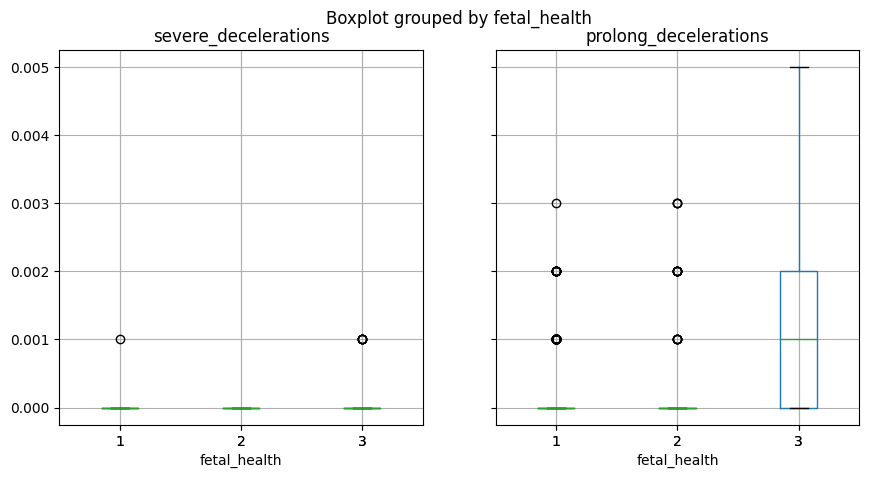

In [21]:
boxplot = fetal.boxplot(column=['severe_decelerations','prolong_decelerations'],by = 'fetal_health', figsize=(10,5))


# Check for missing values:

In [24]:
df.isnull().sum()

accelerations                0
fetal_mov                    0
uterine_contractions         0
light_decelerations          0
severe_decelerations         0
prolong_decelerations        0
abnorm_short_var             0
mean_short_var               0
perc_time_abnorm_long_var    0
mean_long_var                0
hist_min                     0
hist_max                     0
hist_peaks                   0
hist_zeroes                  0
hist_mean                    0
hist_var                     0
hist_tendency                0
fetal_health                 0
dtype: int64

In [25]:
!pip install researchpy

In [26]:
import researchpy as rp


In [27]:
df['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [29]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 1700
The number of records in the test dataset is 426


In [30]:
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the test dataset is 426
The training dataset has 1322 records for the majority class and 231 records for the minority class.


In [32]:
y_test.value_counts()

1    333
2     64
3     29
Name: fetal_health, dtype: int64


# Undersampling


In [33]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

In [34]:
X_train_rus.head(2)

,accelerations,fetal_mov,uterine_contractions,light_decelerations,severe_decelerations,prolong_decelerations,abnorm_short_var,mean_short_var,perc_time_abnorm_long_var,mean_long_var,hist_min,hist_max,hist_peaks,hist_zeroes,hist_mean,hist_var,hist_tendency
0,0.006,0.002,0.004,0.002,0.0,0.0,56.0,1.4,0.0,12.3,90.0,169.0,3.0,0.0,126.0,19.0,0.0
1,0.000,0.001,0.005,0.000,0.0,0.0,63.0,0.7,59.0,4.0,120.0,140.0,2.0,0.0,125.0,0.0,-1.0


In [35]:
y_train_rus.head(2)

0    1
1    1
Name: fetal_health, dtype: int64

In [36]:
y_train_rus.value_counts()

1    147
2    147
3    147
Name: fetal_health, dtype: int64

In [37]:
df_resampled=result = pd.concat([X_train_rus, y_train_rus], axis=1)

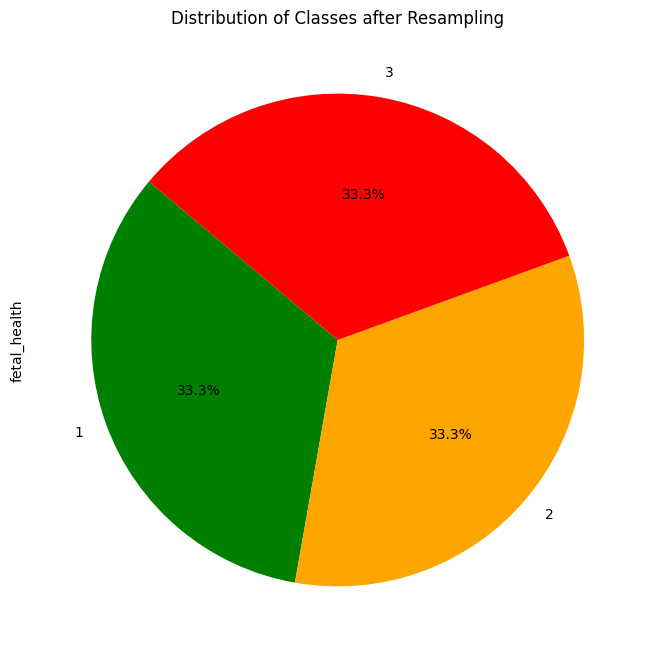

In [38]:
# Get the value counts of the 'fetal_health' column
class_counts = df_resampled['fetal_health'].value_counts()

# Specify colors: assuming class 1 is 'Normal', class 3 is 'Pathological'
colors = ['green', 'orange', 'red']  # Adjust according to your class order

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Classes after Resampling')
plt.ylabel('fetal_health')
plt.show()

In [39]:
df_resampled['fetal_health'].value_counts()

1    147
2    147
3    147
Name: fetal_health, dtype: int64

In [40]:
smo = df_resampled

In [41]:
predictors = smo.columns.tolist()
predictors.remove('fetal_health')

In [ ]:
#Now we have re-sampled data

### Now we have re-sampled data

### The modelling techniques to use:

Random Forest

KNN

Desicion Tree

Linear Regression

Logistic Regression

Voting Classifier

In [43]:
# Let's start with Random Forest

In [42]:
X = smo.iloc[:, :-1]
y = smo.iloc[:, -1]

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 352
The number of records in the test dataset is 89


In [46]:
from sklearn.ensemble import RandomForestClassifier


In [47]:
RF=RandomForestClassifier(n_estimators=100)

In [48]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=RF.predict(X_test)

In [50]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.9325842696629213


In [51]:
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import confusion_matrix, classification_report



In [52]:
confusion_matrix(y_test, y_pred)

array([[33,  3,  0],
       [ 1, 24,  2],
       [ 0,  0, 26]])

In [53]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.97      0.92      0.94        36
           2       0.89      0.89      0.89        27
           3       0.93      1.00      0.96        26

    accuracy                           0.93        89
   macro avg       0.93      0.94      0.93        89
weighted avg       0.93      0.93      0.93        89



In [54]:
feature_importances = RF.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

,Importance
hist_mean,0.166524
abnorm_short_var,0.162759
perc_time_abnorm_long_var,0.123613
mean_long_var,0.086666
mean_short_var,0.084414
accelerations,0.072911
hist_min,0.049208
prolong_decelerations,0.047982
hist_var,0.047663
hist_max,0.045517


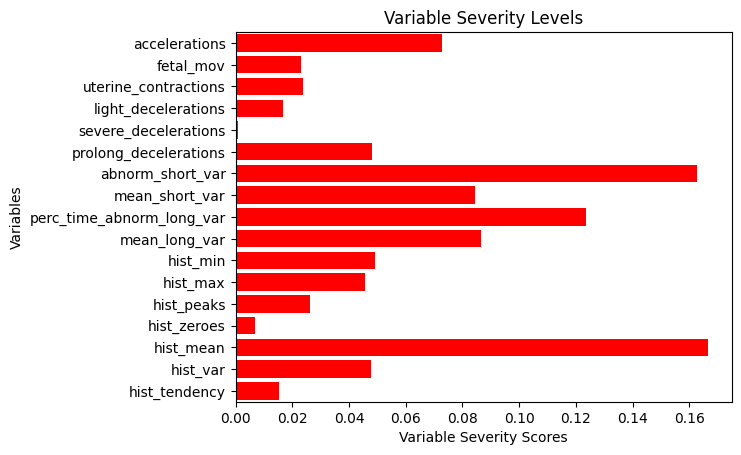

In [55]:
feature_importances_list = predictors
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

### Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [58]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [59]:
y_predic = clf.predict(X_test)
y_predic

array([1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 3, 1, 2, 2, 3, 1, 1, 1, 2,
       2, 1, 2, 3, 3, 1, 3, 2, 3, 1, 2, 2, 1, 1, 3, 2, 1, 3, 2, 2, 2, 1,
       2, 3, 1, 2, 3, 2, 2, 2, 1, 3, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 3, 1,
       1])

In [60]:
print("Accuracy of this model is:", accuracy_score(y_test, y_predic))

Accuracy of this model is: 0.8651685393258427


In [61]:
sco = accuracy_score(y_test, y_predic)*100

In [62]:
print("Our model is", sco, "accurate, that is a quite high score." )

Our model is 86.51685393258427 accurate, that is a quite high score.


In [63]:
print(classification_report(y_test, y_predic))


              precision    recall  f1-score   support

           1       0.97      0.83      0.90        36
           2       0.76      0.81      0.79        27
           3       0.86      0.96      0.91        26

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.86        89
weighted avg       0.87      0.87      0.87        89



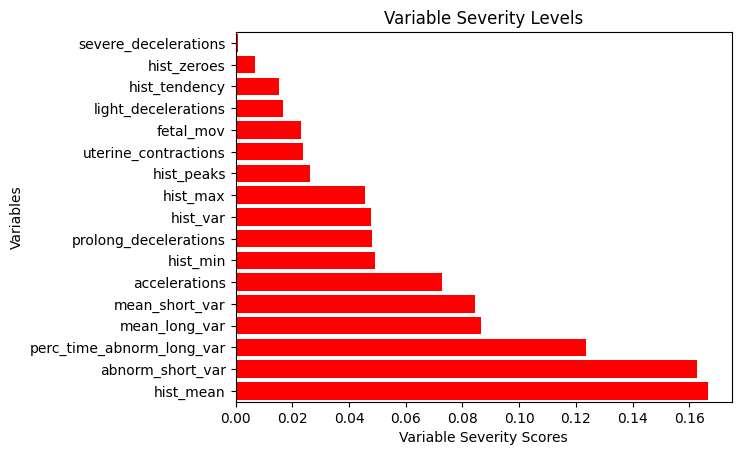

In [67]:
# Create a DataFrame with feature importances
importance_df = pd.DataFrame(data=feature_importances, index=predictors, columns=['Importance'])

# Filter out features with 0 importance and sort the remaining
filtered_importance_df = importance_df[importance_df['Importance'] > 0].sort_values(by=['Importance'], ascending=True)

# Plot the sorted and filtered feature importances
sns.barplot(x=filtered_importance_df['Importance'], y=filtered_importance_df.index, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()


### Pruning tree

In [68]:
# compute the accuracy on the validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# create and fit the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)

# use cost-complexity pruning to find the best tree
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# find the tree with the highest validation accuracy
val_accs = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]
best_clf_idx = np.argmax(val_accs)
best_clf = clfs[best_clf_idx]

# compute the accuracy on the test set
y_pred = best_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

In [70]:
test_acc

0.9550561797752809

In [71]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.97      0.92      0.94        36
           2       0.90      0.96      0.93        27
           3       1.00      1.00      1.00        26

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89



## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [75]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred=KNN.predict(X_test)

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.8651685393258427


In [78]:
confusion_matrix(y_test, y_pred)

array([[30,  6,  0],
       [ 3, 22,  2],
       [ 0,  1, 25]])

In [79]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.91      0.83      0.87        36
           2       0.76      0.81      0.79        27
           3       0.93      0.96      0.94        26

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.87        89
weighted avg       0.87      0.87      0.87        89



## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs')
log_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [88]:
y_log_pred = log_model.predict(X_test)
y_log_pred.shape[0]

89

In [89]:
f1_score(y_test,y_log_pred, average=None)

array([0.87323944, 0.68085106, 0.86666667])

In [83]:
accuracy_score(y_test,y_log_pred)

0.8202247191011236

In [84]:
precision_score(y_test,y_log_pred, average=None)

array([0.90909091, 0.75      , 0.78125   ])

In [85]:
recall_score(y_test,y_log_pred, average=None)

array([0.83333333, 0.66666667, 0.96153846])

In [86]:
print(classification_report(y_test,y_log_pred))


              precision    recall  f1-score   support

           1       0.91      0.83      0.87        36
           2       0.75      0.67      0.71        27
           3       0.78      0.96      0.86        26

    accuracy                           0.82        89
   macro avg       0.81      0.82      0.81        89
weighted avg       0.82      0.82      0.82        89



In [90]:
feature_importances = log_model.coef_[0]
pd.DataFrame(data=feature_importances, index=predictors,
             columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

,Importance
hist_mean,3.672941e-02
hist_max,2.247347e-02
mean_short_var,3.735207e-03
accelerations,6.286074e-04
uterine_contractions,4.487896e-04
light_decelerations,1.292115e-04
severe_decelerations,-7.924252e-08
prolong_decelerations,-1.177636e-04
hist_tendency,-3.799134e-03
fetal_mov,-7.408014e-03


In [91]:
feat_importance_log = log_model.coef_[0]

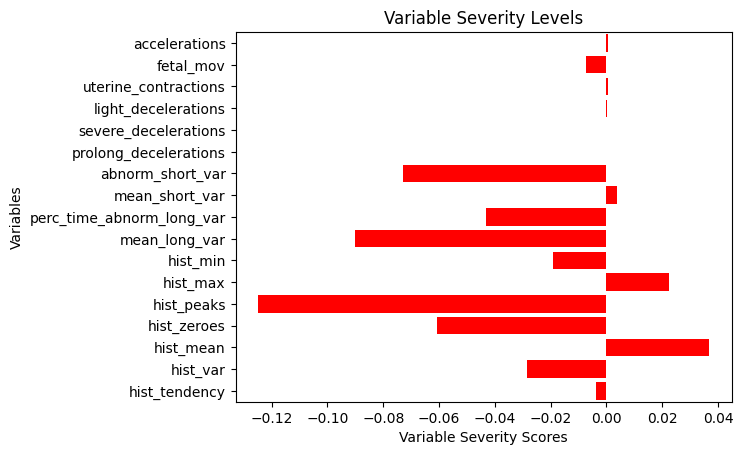

In [93]:
feature_importances_list = predictors
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

### Gaussian Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           1       0.97      0.89      0.93        36
           2       0.74      0.85      0.79        27
           3       0.88      0.85      0.86        26

    accuracy                           0.87        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.87      0.87      0.87        89



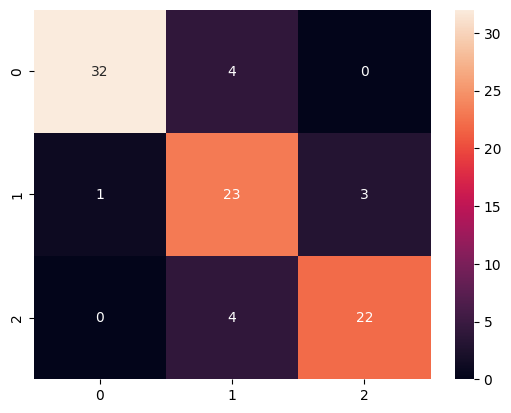

In [95]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gnb)
f = sns.heatmap(cm, annot=True, fmt='d')